# Machine Learning in Life Scicence WS 2016 - 2017
## Exercise 1 - Dataset  
a) Create a dataset in R^2 with two classes (positive with target 1 and negative with target 0). Consider 100 datapoints for each class. Let the instances for each class be sampled from a bivariate Gaussian distribution with the same variance.

In [100]:
# Implementation taken from the sklearn website:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html
help (min)

lst1 = [1, 2, 3]
lst2 = [3, 4, 5]
print ( [x * y for x in lst1 for y in lst2])

print ([x for x in lst1 if 4 > x > 1])
print ( [1] * 10)

Help on built-in function min in module builtins:

min(...)
    min(iterable, *[, default=obj, key=func]) -> value
    min(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its smallest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the smallest argument.

[3, 4, 5, 6, 8, 10, 9, 12, 15]
[2, 3]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [78]:
# Importing numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt


In [188]:
#Settings
## Creating dataset here, 100 data points 
# numpy.random.multivariate_normal(mean, cov[size])
# Draw random samples from multivariate normal distribution
mean = [0, 0]
cov = [[0.7,0.5 ], [0.5, 0.5]] # diagonal variance 
n = 100 # number of points 
#Diagonal covariance means that points are oriented along x or y-axis

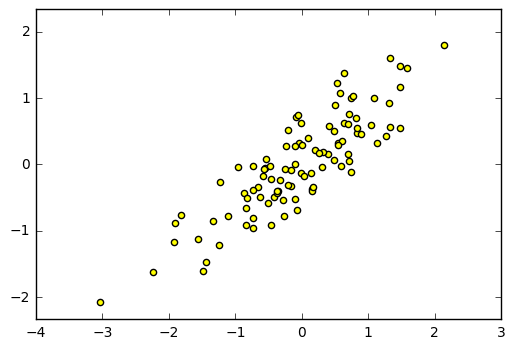

In [189]:
#Example taking from the website of sklearn

x = np.random.multivariate_normal(mean, cov, n )
XPositive = [val for val in x[:,1]  if val >= 0]
XNegative = [val for val in x[:,1]  if val < 0]
plt.scatter(x[:,0],x[:,1]  , c = 'yellow')
plt.axis('equal')
plt.show()



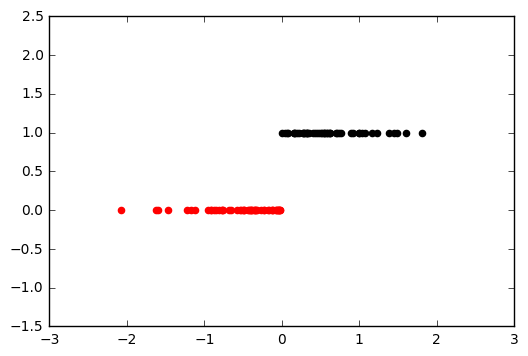

In [190]:
YPositive = [1] * len(XPositive)
YZero = [0] * len(XNegative)
plt.scatter(XPositive, YPositive, color='black')
plt.scatter(XNegative, YZero , color='red')
plt.axis('equal')
plt.show()



## Exercise 2 - Linear Model
a) Write the code to compute a Linear classification model. Apply it to the dataset created in Exercise 1. Plot the predicted class for a regular grid in R^2. 

In [191]:
#Apply Linear Model on different type of distributions
# Split the data into training/testing sets
trainX = XPositive[:-20] + XNegative[:-20] # take 80 sample dataset as a Training
testX = XPositive[-20:] + XNegative[-20:] # take 20 sample datset for testing


# Split target also into training/ testing sets
trainY = [1] * len(XPositive[:-20]) +  [0] * len(XNegative[:-20])
testY = [1] * len(XPositive[-20:]) + [0] * len(XNegative[-20:])


Linear Model Starts Here:
Coefficients: [[ 0.50884495]]
Mean squared error: 0.01
Variance score: 0.63


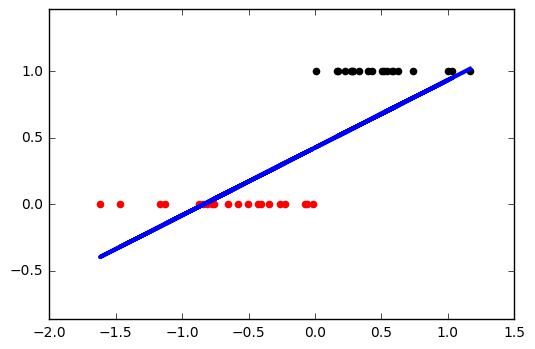

In [192]:
from sklearn import linear_model

#Using Linear Model 
print ('Linear Model Starts Here:')

#Intialize
regr = linear_model.LinearRegression()

trainX = np.asarray(trainX)
trainY= np.asarray(trainY)

trainX= trainX.reshape(trainX.size, 1)
trainY= trainY.reshape(trainY.size, 1)
# Fit
regr.fit(trainX, trainY);

# The Coefficients
print ('Coefficients:', regr.coef_)

testX = np.asarray(testX)
testX = testX.reshape(testX.size, 1)

#Predict
predictX = regr.predict(testX)
testY =  np.asarray(testY)
testY = testY.reshape(testY.size,1)


#The mean squared error
print("Mean squared error: %.2f" % np.mean((predictX) - testY) **2  ) # (y^ - y)^2


#Explained variance score: 1 is perfect
print ('Variance score: %.2f' % regr.score(testX, testY))


#plot outputs 
YPositive = [1] * len(XPositive[-20:])
YZero = [0] * len(XNegative[-20:])
plt.scatter(XPositive[-20:], YPositive, color='black')
plt.plot(testX, predictX, color='blue', linewidth=3)
plt.scatter(XNegative[-20:], YZero , color='red')


plt.axis('equal')
plt.show()



## Exercise 3 - kNN Model
a) Write the code to compute a KNN model. Apply it to the dataset created in Exercise 1. Plot the predicted class for a regular grid in R^2. 